In [1]:
try:
    import code_bert_score
except ImportError:
    print(
        "This notebook requires a fork of code_bert_score to be installed:", 
        "pip install git+https://github.com/joaomonteirof/code-bert-score"
        )
from src import datasets_loader
from src.constants import GFG_DATA_PATH
import numpy as np
from matplotlib import pyplot as plt


In [2]:
DEVICE = "cuda:0"
MAX_RAW_LEN = 10000

In [3]:
def get_dataset(maximum_raw_length):
    test_data = datasets_loader.get_dataset(  # Geeks4Geeks data
        dataset_name="gfg",
        path_to_cache=GFG_DATA_PATH,
        split="test",
        maximum_raw_length=maximum_raw_length,
    )

    return test_data


def summarize_sequence(sequence):
    def ci95(seq):
        return 1.96 * np.std(seq) / np.sqrt(len(seq))

    return f"{100*np.mean(sequence):.2f}+-{100*ci95(sequence):.2f}"


def evaluate(model_path, maximum_raw_length):
    test_data = get_dataset(maximum_raw_length)

    source_entries, target_entries = [], []
    for source, target in test_data:
        source_entries.append(source)
        target_entries.append(target)

    return code_bert_score.score(
        source_entries, target_entries, model_type=model_path, verbose=True
    )

In [4]:
p_starencoder, r_starencoder, f1_starencoder, f3_starencoder = evaluate("bigcode/starencoder", MAX_RAW_LEN)

Loading cached shuffled indices for dataset at /mnt/home/research-BertBigCode/resources/data/transcoder_evaluation_gfg/cache-e9f62aa12abed28d.arrow
Loading cached processed dataset at /mnt/home/research-BertBigCode/resources/data/transcoder_evaluation_gfg/cache-62c8dbaa90db85ee_*_of_00096.arrow
Loading cached shuffled indices for dataset at /mnt/home/research-BertBigCode/resources/data/transcoder_evaluation_gfg/cache-f652c1e33d8c1a14.arrow


calculating scores...
computing bert embedding.


  0%|          | 0/18 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/9 [00:00<?, ?it/s]

done in 8.53 seconds, 67.53 sentences/sec


In [5]:
print("bigcode/starencoder", summarize_sequence(f1_starencoder.detach().cpu().numpy()))

bigcode/starencoder 92.37+-0.25


In [6]:
p_codebert, r_codebert, f1_codebert, f3_codebert = evaluate("microsoft/codebert-base", MAX_RAW_LEN)

Loading cached shuffled indices for dataset at /mnt/home/research-BertBigCode/resources/data/transcoder_evaluation_gfg/cache-e9f62aa12abed28d.arrow
Loading cached processed dataset at /mnt/home/research-BertBigCode/resources/data/transcoder_evaluation_gfg/cache-62c8dbaa90db85ee_*_of_00096.arrow
Loading cached shuffled indices for dataset at /mnt/home/research-BertBigCode/resources/data/transcoder_evaluation_gfg/cache-f652c1e33d8c1a14.arrow


calculating scores...
computing bert embedding.


  0%|          | 0/18 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/9 [00:00<?, ?it/s]

done in 10.57 seconds, 54.51 sentences/sec


In [7]:
print("microsoft/codebert-base", summarize_sequence(f1_codebert.detach().cpu().numpy()))

microsoft/codebert-base 89.42+-0.28


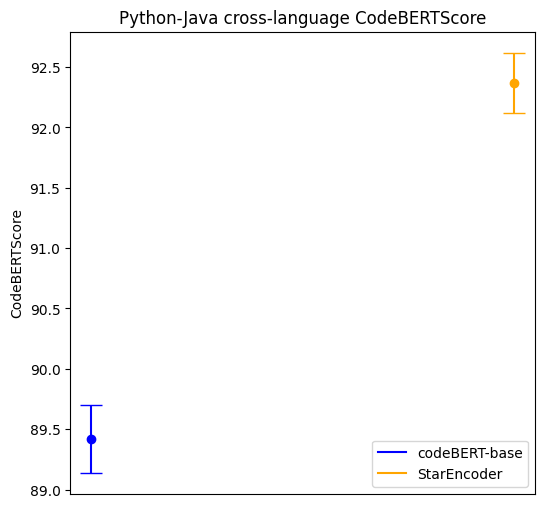

In [8]:
fig, ax = plt.subplots(figsize=(6,6), facecolor="white")

ax.set_title("Python-Java cross-language CodeBERTScore")
ax.get_xaxis().set_visible(False)
ax.set_ylabel("CodeBERTScore")

starencoder_ci = summarize_sequence(f1_starencoder.detach().cpu().numpy())
codebert_ci = summarize_sequence(f1_codebert.detach().cpu().numpy())

starencoder_center, starencoder_error = starencoder_ci.split("+-")
codebert_center, codebert_error = codebert_ci.split("+-")

plt.plot(1, float(codebert_center), color="blue", label="codeBERT-base")
plt.errorbar(1, float(codebert_center), yerr=float(codebert_error), fmt ='-o', color="blue", capsize=8)
plt.plot(2, float(starencoder_center), color="orange", label="StarEncoder")
plt.errorbar(2, float(starencoder_center), yerr=float(starencoder_error), fmt ='-o', color="orange", capsize=8)

plt.legend(loc="lower right")
plt.show()
        